In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv('data/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('data/fashion-mnist_test.csv', sep=',')

In [3]:
# data visualization
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.shape

(60000, 785)

In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

4.0

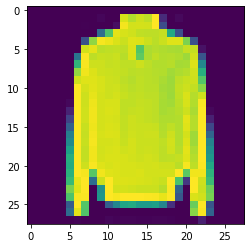

In [49]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i,0]
label

In [9]:
# the label that we printed above :
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

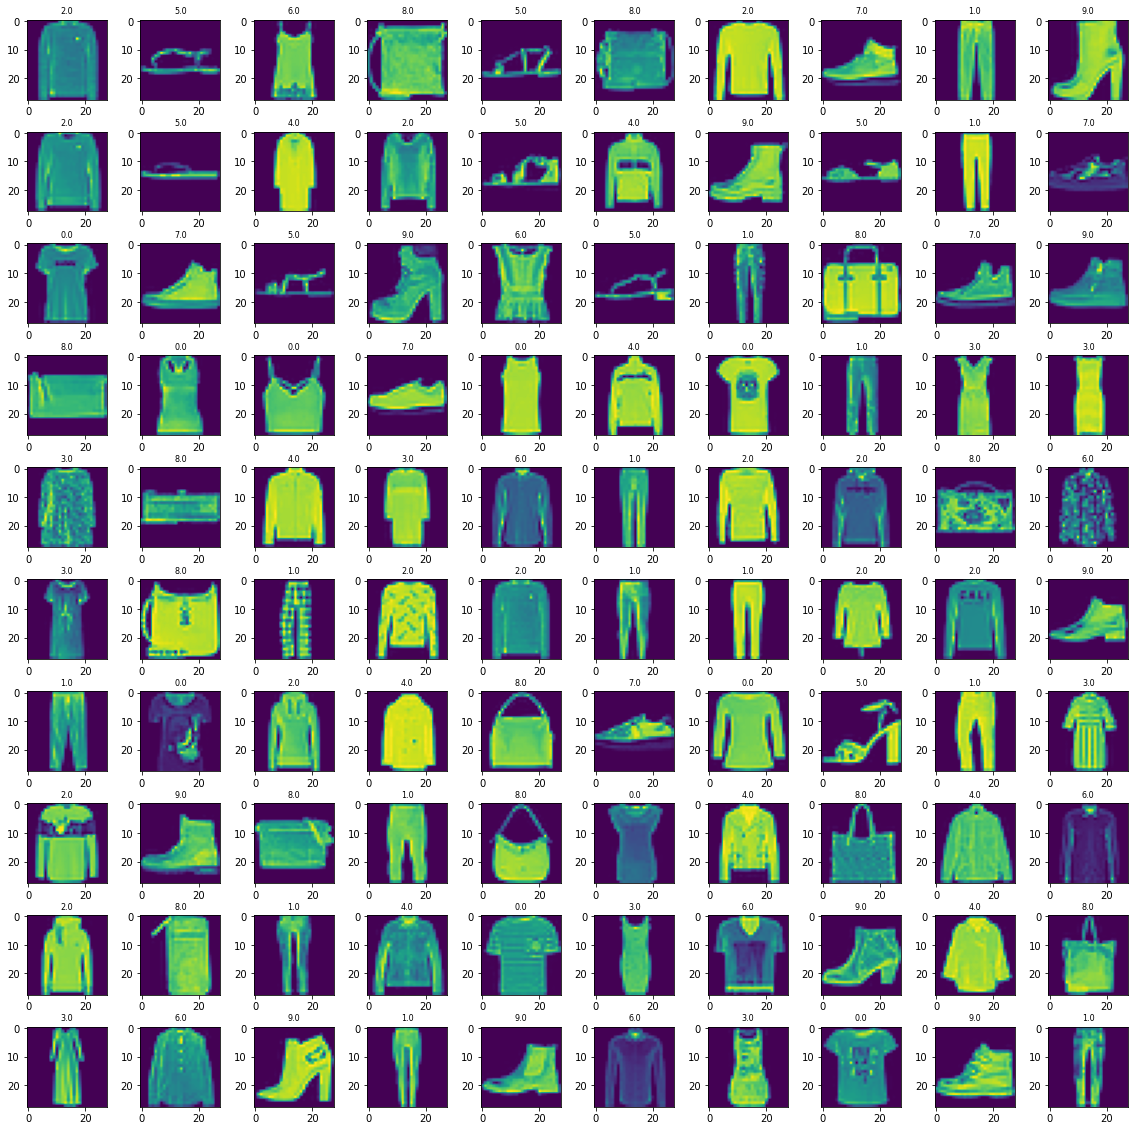

In [51]:
# creating a grid:
W_grid = 10
L_grid = 10

# subplot returns the figure object and the axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize=(20,20))

# flatten the 10x10 matrix into an array of length 100
axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis = 'off'
    
plt.subplots_adjust(hspace = 0.4)

In [11]:
# Using CNN to train the model

In [12]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model = Sequential()

In [20]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation='relu'))
# 32 is the kernel size, we can increase it to increase accuracy

In [21]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
cnn_model.add(Flatten())

In [23]:
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='sigmoid'))

In [24]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

In [26]:
epochs = 50 

In [27]:
cnn_model.fit(X_train, y_train, batch_size=64, epochs=epochs, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/50
750/750 [==============================] - 9s 10ms/step - loss: 0.7302 - accuracy: 0.7441 - val_loss: 0.5595 - val_accuracy: 0.7936
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4897 - accuracy: 0.8195 - val_loss: 0.4642 - val_accuracy: 0.8351
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4449 - accuracy: 0.8366 - val_loss: 0.4350 - val_accuracy: 0.8407
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4191 - accuracy: 0.8473 - val_loss: 0.4149 - val_accuracy: 0.8502
Epoch 5/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4016 - accuracy: 0.8535 - val_loss: 0.4019 - val_accuracy: 0.8550
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3906 - accuracy: 0.8570 - val_loss: 0.3919 - val_accuracy: 0.8576
Epoch 7/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3804 - accuracy: 0.8590 - val_loss: 0.3891 - val_accuracy: 0.8572
Epoch

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.3341 - accuracy: 0.8828
Test Accuracy : 0.883


In [29]:
#increase epochs and decrease batch_size to increase accuracy, also increase kernels to increase accuracy

In [37]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [38]:
predictions

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

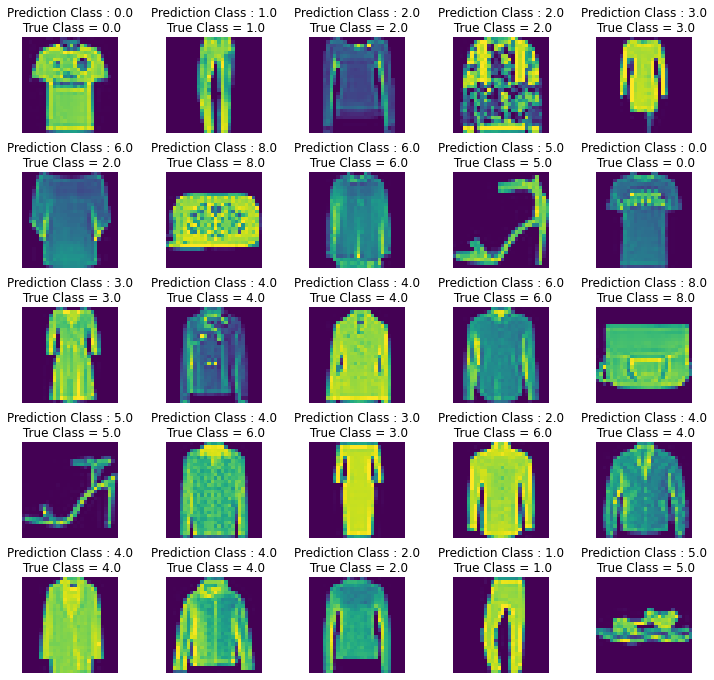

In [45]:
L=5
W=5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class : {:0.1f}\n True Class = {:0.1f}".format(predictions[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

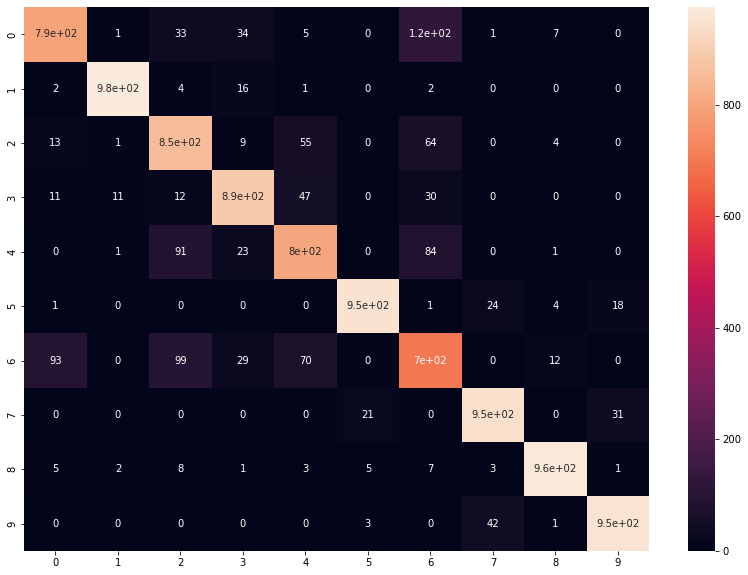

In [46]:
# making a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [47]:
from sklearn.metrics import classification_report


num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predictions, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.79      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.78      0.85      0.81      1000
     Class 3       0.89      0.89      0.89      1000
     Class 4       0.82      0.80      0.81      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.69      0.70      0.69      1000
     Class 7       0.93      0.95      0.94      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

